In [1]:
import networkx as nx
import seaborn as sns
import pandas as pd
from ipysigma import Sigma
from pelote import monopartite_projection, filter_edges
from collections import Counter

In [2]:
g = nx.read_gexf('../data/theatre_critique_n0_fixed.gexf')

In [3]:
critique_to_critique_edges = []

for u, v in g.edges:
    ua = g.nodes[u]
    va = g.nodes[v]
    
    if ua.get('Type') == 'critique' and va.get('Type') == 'critique':
        critique_to_critique_edges.append(((ua.get('Nature', 'na'), ua['label']), (va.get('Nature', 'na'), va['label'])))

In [4]:
critique_to_critique_edges[:5]

[(('individu', 'Abrideabattue.blogspot.com'), ('individu', 'Aubalcon.fr')),
 (('individu', 'Abrideabattue.blogspot.com'),
  ('individu', 'Lestroiscoups.fr')),
 (('individu', 'Annetheatrepassion.blogspot.com'),
  ('individu', 'Aubalcon.fr')),
 (('individu', 'Annetheatrepassion.blogspot.com'),
  ('professionelle', 'Journal-Laterrasse.fr')),
 (('individu', 'Annetheatrepassion.blogspot.com'),
  ('professionelle', 'Loeildolivier.fr'))]

In [5]:
len(critique_to_critique_edges)

140

In [6]:
heatmap_graph = nx.DiGraph()
counts = Counter()

for (u, _), (v, _) in critique_to_critique_edges:
    if 'na' in [u, v]:
        continue
    
    if heatmap_graph.has_edge(u, v):
        heatmap_graph[u][v]['weight'] += 1
    else:
        heatmap_graph.add_edge(u, v, weight=1)
        
    counts[u] += 1
    counts[v] += 1
    
counts.most_common()

for u, v, a in heatmap_graph.edges.data():
    a['normalized_weight'] = a['weight'] / counts[u]

In [7]:
df = nx.to_pandas_adjacency(heatmap_graph)
df

,individu,professionelle,academique,presse
individu,32.0,23.0,1.0,7.0
professionelle,6.0,20.0,4.0,8.0
academique,0.0,3.0,10.0,0.0
presse,11.0,6.0,2.0,3.0


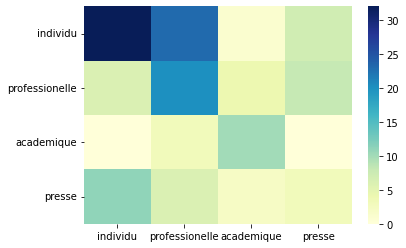

In [8]:
sns.heatmap(df, cmap="YlGnBu")
None

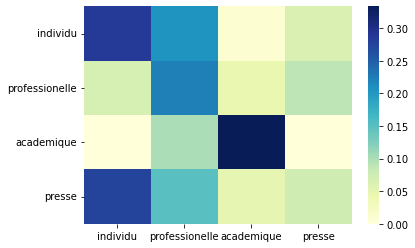

In [9]:
sns.heatmap(nx.to_pandas_adjacency(heatmap_graph, weight='normalized_weight'), cmap="YlGnBu")
None

In [10]:
bipartite_critique = filter_edges(g, lambda u, v, a: not (g.nodes[u].get('Type') == 'critique' and g.nodes[v].get('Type') == 'critique'))

In [15]:
subcritique = g.copy()
to_drop = []
for node, attr in subcritique.nodes.data():
    if attr.get('Type') != 'critique':
        to_drop.append(node)
        
for node in to_drop:
    subcritique.remove_node(node)

In [20]:
Sigma(
    subcritique,
    node_size=subcritique.out_degree,
    node_metrics=['louvain'],
    node_color='louvain'
)

Sigma(nx.DiGraph with 148 nodes and 140 edges)

In [22]:
Sigma(
    subcritique,
    node_size=subcritique.out_degree,
    node_metrics=['louvain'],
    node_color='louvain'
)

Sigma(nx.DiGraph with 148 nodes and 140 edges)